In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping
import pickle as pickle
import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
pickle_in = open("./data/pickle/X_train.pickle","rb")
X_train = pickle.load(pickle_in)

pickle_in = open("./data/pickle/Y_train.pickle","rb")
Y_train = pickle.load(pickle_in)



pickle_in = open("./data/pickle/X_test.pickle","rb")
X_test = pickle.load(pickle_in)

pickle_in = open("./data/pickle/Y_test.pickle","rb")
Y_test = pickle.load(pickle_in)

print(f"X_train= {X_train.shape} Y_train= {Y_train.shape}")
print(f"X_test= {X_test.shape} Y_test= {Y_test.shape}")

X_train= (8005, 160, 160, 3) Y_train= (8005,)
X_test= (2021, 160, 160, 3) Y_test= (2021,)


In [3]:
mean_rgb = np.mean(X_train, axis=(0,1,2))
print(mean_rgb)

[20.958422 20.958422 20.958422]


In [4]:

X_train_norm = np.empty_like(X_train)
X_test_norm = np.empty_like(X_test)

In [5]:
for i in range(len(X_train)):
    for c in range(3):
        if(c==1):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[1]
        else:
            X_train_norm[i,:, :, c] = X_train[i,:, :, c] - mean_rgb[2]
            
for i in range(len(X_test)):
    for c in range(3):
        if(c==1):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[0]
        elif(c==2):
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[1]
        else:
            X_test_norm[i,:, :, c] = X_test[i,:, :, c] - mean_rgb[2]

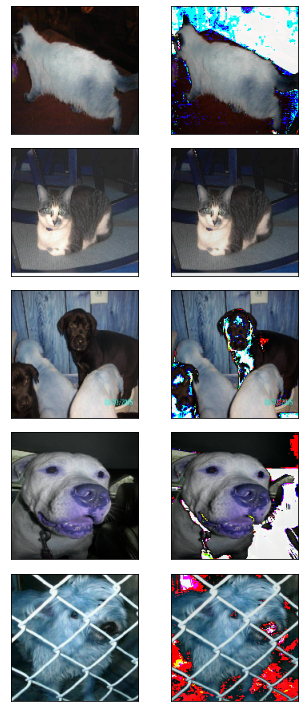

In [6]:
c = 0
plt.figure(figsize=(5,10))
for i in range(5):
    plt.subplot(5,2,c+1)
    plt.imshow(X_train[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(5,2,c+2)
    plt.imshow(X_train_norm[i].astype('uint8'))
    plt.xticks([])
    plt.yticks([])

    c += 2
    
plt.tight_layout()
plt.show()

In [7]:
model = keras.Sequential([
    ## input layer
    keras.Input(shape=X_train_norm.shape[1:]),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=128, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'),
    
    
    layers.Flatten(),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),
    
    layers.Dense(units=4096),
    layers.Activation('relu'),
    layers.Dropout(0.5),

    layers.Dense(10),
    layers.Activation('softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 160, 160, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 160, 160, 64)      36928     
_________________________________________________________________
activation_1 (Activation)    (None, 160, 160, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 128)       73856     
_________________________________________________________________
activation_2 (Activation)    (None, 80, 80, 128)       0

In [8]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [9]:

cb = EarlyStopping(monitor='val_loss', min_delta=0.02, patience=5, restore_best_weights=True)

h = model.fit(x=X_train_norm, y=Y_train, 
              epochs=20, 
              validation_split=0.2,
              batch_size=128,
              callbacks=[cb]
             )

Epoch 1/20
51/51 [==============================] - 516s 10s/step - loss: 1.4824 - accuracy: 0.4712 - val_loss: 0.7091 - val_accuracy: 0.5097
Epoch 2/20
51/51 [==============================] - 533s 10s/step - loss: 0.6996 - accuracy: 0.5357 - val_loss: 0.6709 - val_accuracy: 0.6221
Epoch 3/20
51/51 [==============================] - 540s 11s/step - loss: 0.6512 - accuracy: 0.6292 - val_loss: 0.5977 - val_accuracy: 0.6871
Epoch 4/20
51/51 [==============================] - 537s 11s/step - loss: 0.6110 - accuracy: 0.6688 - val_loss: 0.6385 - val_accuracy: 0.6315
Epoch 5/20
51/51 [==============================] - 537s 11s/step - loss: 0.6533 - accuracy: 0.6340 - val_loss: 0.5727 - val_accuracy: 0.6864
Epoch 6/20
51/51 [==============================] - 537s 11s/step - loss: 0.5498 - accuracy: 0.7171 - val_loss: 0.5917 - val_accuracy: 0.6933
Epoch 7/20
51/51 [==============================] - 536s 11s/step - loss: 0.5410 - accuracy: 0.7325 - val_loss: 0.6265 - val_accuracy: 0.6839
Epoch 

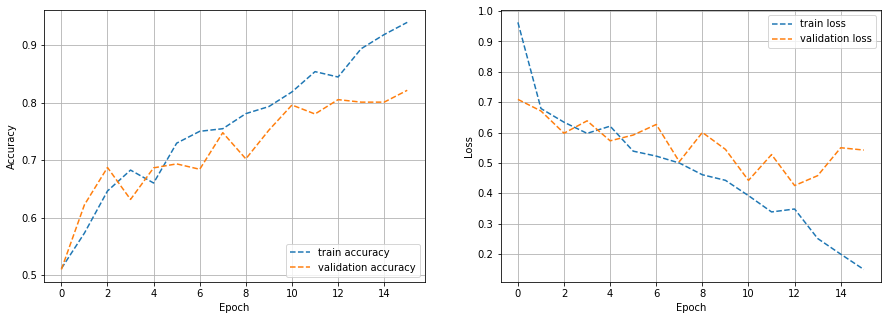

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], '--', label='train accuracy')
plt.plot(h.history['val_accuracy'], '--', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], '--', label='train loss')
plt.plot(h.history['val_loss'], '--', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

In [11]:

test_loss, test_acc = model.evaluate(X_test_norm, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

64/64 [==============================] - 36s 550ms/step - loss: 0.4450 - accuracy: 0.8110

Test Accuracy: 0.8109846711158752

Test Loss: 0.4449712038040161


In [12]:
model.save('cats_dogs_vggnet.h5')

In [13]:
print(model.predict(X_test[:1]))

[[7.8722966e-01 2.1086745e-01 2.4438862e-04 1.9482410e-04 3.5275563e-04
  1.4318609e-04 3.1427052e-04 1.6236270e-04 2.3812141e-04 2.5297972e-04]]
